In [ ]:
import pandas as pd
import numpy as np
import os
import dill
import pandas as pd
import glob, csv
import nltk
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
nltk.download('punkt')
lemmatizer = WordNetLemmatizer()


import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import re
import string
import seaborn as sns
from sklearn.preprocessing import StandardScaler

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#this mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# enter the foldername in the Shared Google Drive
FOLDERNAME = 'Shared drives/CS 230 Project'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/{}'.format(FOLDERNAME))

%cd /content/drive/$FOLDERNAME/

Mounted at /content/drive
/content/drive/Shared drives/CS 230 Project


In [ ]:
# !unzip '/content/drive/Shared drives/CS 230 Project/datasets/C50.zip'

Train preprocess

In [ ]:
train_file_df = pd.DataFrame()
temp_df = pd.DataFrame()
for i, filepath in enumerate(glob.iglob('C50train/*/*.txt')):
    print('Analysing', i , ' -> ', ' of Author ', str(filepath.split("/")[1]))
    temp_df = pd.read_csv(filepath, delimiter="\t", header = None, error_bad_lines=False, quoting = csv.QUOTE_NONE, encoding='utf-8')
    # print(temp_df)
    temp_df['Author'] = filepath.split("/")[1]
    temp_frame = [train_file_df, temp_df]
    train_file_df = pd.concat(temp_frame)
    
train_file_df = train_file_df.rename(columns={ 0 : 'text'})

Analysing 0  ->   of Author  AaronPressman
                                                    0
0   The Commerce Department will issue final rules...
1   Some changes were made in the final rules, ava...
2   Commerce undersecretary William Reinsch had sa...
3   Under the previous rules dating from the Cold ...
4   In the past, products could be exported using ...
5   At the same time, with the growth of the Inter...
6   The Commerce Department rules were intended as...
7   The policy relies on so-called key recovery fe...
8   Under the policy to be issued Monday, products...
9   Software firms had hoped the key recovery exce...
10  Non-key recovery software with keys of up to 5...
11  Some companies had complained that the governm...
12  All other encryption products, such as state-o...
13  The rules deleted a draft provision allowing k...
14  The final rules also made clear that an applic...
15  A criteria listed as "public support for a key...
Analysing 1  ->   of Author  AaronPress

ParserError: ignored

In [ ]:
train_file_df

,text,Author
0,The Commerce Department will issue final rules...,AaronPressman
1,"Some changes were made in the final rules, ava...",AaronPressman
2,Commerce undersecretary William Reinsch had sa...,AaronPressman
3,Under the previous rules dating from the Cold ...,AaronPressman
4,"In the past, products could be exported using ...",AaronPressman
...,...,...
12,China sees these laws as U.S. interference in ...,WilliamKazer
13,"Qian said that over the last year, Beijing had...",WilliamKazer
14,Beijing was willing to work with the United St...,WilliamKazer
15,Sino-U.S. relations were badly strained by Bei...,WilliamKazer


Create new col with author number mappings for ML

In [ ]:
# create new col with author number mappings for ML
auth_sort = sorted(train_file_df['Author'].unique())
dictOfAuthors = { i : auth_sort[i] for i in range(0, len(auth_sort) ) }
swap_dict = {value:key for key, value in dictOfAuthors.items()}
train_file_df['Author_num'] = train_file_df['Author'].map(swap_dict)
train_file_df

,text,Author,Author_num
0,The Commerce Department will issue final rules...,AaronPressman,0
1,"Some changes were made in the final rules, ava...",AaronPressman,0
2,Commerce undersecretary William Reinsch had sa...,AaronPressman,0
3,Under the previous rules dating from the Cold ...,AaronPressman,0
4,"In the past, products could be exported using ...",AaronPressman,0
...,...,...,...
12,China sees these laws as U.S. interference in ...,WilliamKazer,49
13,"Qian said that over the last year, Beijing had...",WilliamKazer,49
14,Beijing was willing to work with the United St...,WilliamKazer,49
15,Sino-U.S. relations were badly strained by Bei...,WilliamKazer,49


Test Preprocess

In [ ]:
test_file_df = pd.DataFrame()
temp_df = pd.DataFrame()
for i, filepath in enumerate(glob.iglob('C50test/*/*.txt')):
    print('Analysing', i , ' -> ', ' of Author ', str(filepath.split("/")[1]))
    temp_df = pd.read_csv(filepath, delimiter="\t", header = None, error_bad_lines=False, quoting = csv.QUOTE_NONE, encoding='utf-8')
    temp_df['Author'] = filepath.split("/")[1]
    temp_frame = [test_file_df, temp_df]
    test_file_df = pd.concat(temp_frame)
    
test_file_df = test_file_df.rename(columns={ 0 : 'text'})
test_file_df.head(3)

Analysing 0  ->   of Author  WilliamKazer
Analysing 1  ->   of Author  WilliamKazer
Analysing 2  ->   of Author  WilliamKazer
Analysing 3  ->   of Author  WilliamKazer
Analysing 4  ->   of Author  WilliamKazer
Analysing 5  ->   of Author  WilliamKazer
Analysing 6  ->   of Author  WilliamKazer
Analysing 7  ->   of Author  WilliamKazer
Analysing 8  ->   of Author  WilliamKazer
Analysing 9  ->   of Author  WilliamKazer
Analysing 10  ->   of Author  WilliamKazer
Analysing 11  ->   of Author  WilliamKazer
Analysing 12  ->   of Author  WilliamKazer
Analysing 13  ->   of Author  WilliamKazer
Analysing 14  ->   of Author  WilliamKazer
Analysing 15  ->   of Author  WilliamKazer
Analysing 16  ->   of Author  WilliamKazer
Analysing 17  ->   of Author  WilliamKazer
Analysing 18  ->   of Author  WilliamKazer
Analysing 19  ->   of Author  WilliamKazer
Analysing 20  ->   of Author  WilliamKazer
Analysing 21  ->   of Author  WilliamKazer
Analysing 22  ->   of Author  WilliamKazer
Analysing 23  ->   of

b'Skipping line 17: expected 1 fields, saw 2\n'


Analysing 319  ->   of Author  SamuelPerry
Analysing 320  ->   of Author  SamuelPerry
Analysing 321  ->   of Author  SamuelPerry
Analysing 322  ->   of Author  SamuelPerry
Analysing 323  ->   of Author  SamuelPerry
Analysing 324  ->   of Author  SamuelPerry
Analysing 325  ->   of Author  SamuelPerry
Analysing 326  ->   of Author  SamuelPerry
Analysing 327  ->   of Author  SamuelPerry
Analysing 328  ->   of Author  SamuelPerry
Analysing 329  ->   of Author  SamuelPerry
Analysing 330  ->   of Author  SamuelPerry
Analysing 331  ->   of Author  SamuelPerry
Analysing 332  ->   of Author  SamuelPerry
Analysing 333  ->   of Author  SamuelPerry
Analysing 334  ->   of Author  SamuelPerry
Analysing 335  ->   of Author  SamuelPerry
Analysing 336  ->   of Author  SamuelPerry
Analysing 337  ->   of Author  SamuelPerry
Analysing 338  ->   of Author  SamuelPerry
Analysing 339  ->   of Author  SamuelPerry
Analysing 340  ->   of Author  SamuelPerry
Analysing 341  ->   of Author  SamuelPerry
Analysing 3

b'Skipping line 12: expected 1 fields, saw 2\n'


Analysing 698  ->   of Author  MichaelConnor
Analysing 699  ->   of Author  MichaelConnor
Analysing 700  ->   of Author  MarkBendeich
Analysing 701  ->   of Author  MarkBendeich
Analysing 702  ->   of Author  MarkBendeich
Analysing 703  ->   of Author  MarkBendeich
Analysing 704  ->   of Author  MarkBendeich
Analysing 705  ->   of Author  MarkBendeich
Analysing 706  ->   of Author  MarkBendeich
Analysing 707  ->   of Author  MarkBendeich
Analysing 708  ->   of Author  MarkBendeich
Analysing 709  ->   of Author  MarkBendeich
Analysing 710  ->   of Author  MarkBendeich
Analysing 711  ->   of Author  MarkBendeich
Analysing 712  ->   of Author  MarkBendeich
Analysing 713  ->   of Author  MarkBendeich
Analysing 714  ->   of Author  MarkBendeich
Analysing 715  ->   of Author  MarkBendeich
Analysing 716  ->   of Author  MarkBendeich
Analysing 717  ->   of Author  MarkBendeich
Analysing 718  ->   of Author  MarkBendeich
Analysing 719  ->   of Author  MarkBendeich
Analysing 720  ->   of Author 

b'Skipping line 16: expected 1 fields, saw 2\n'
b'Skipping line 11: expected 1 fields, saw 2\n'


Analysing 832  ->   of Author  PatriciaCommins
Analysing 833  ->   of Author  PatriciaCommins
Analysing 834  ->   of Author  PatriciaCommins
Analysing 835  ->   of Author  PatriciaCommins
Analysing 836  ->   of Author  PatriciaCommins
Analysing 837  ->   of Author  PatriciaCommins
Analysing 838  ->   of Author  PatriciaCommins
Analysing 839  ->   of Author  PatriciaCommins
Analysing 840  ->   of Author  PatriciaCommins


b'Skipping line 16: expected 1 fields, saw 2\n'


Analysing 841  ->   of Author  PatriciaCommins
Analysing 842  ->   of Author  PatriciaCommins
Analysing 843  ->   of Author  PatriciaCommins
Analysing 844  ->   of Author  PatriciaCommins
Analysing 845  ->   of Author  PatriciaCommins
Analysing 846  ->   of Author  PatriciaCommins
Analysing 847  ->   of Author  PatriciaCommins
Analysing 848  ->   of Author  PatriciaCommins
Analysing 849  ->   of Author  PatriciaCommins
Analysing 850  ->   of Author  MartinWolk
Analysing 851  ->   of Author  MartinWolk
Analysing 852  ->   of Author  MartinWolk
Analysing 853  ->   of Author  MartinWolk


b'Skipping line 12: expected 1 fields, saw 6\n'


Analysing 854  ->   of Author  MartinWolk
Analysing 855  ->   of Author  MartinWolk
Analysing 856  ->   of Author  MartinWolk
Analysing 857  ->   of Author  MartinWolk
Analysing 858  ->   of Author  MartinWolk
Analysing 859  ->   of Author  MartinWolk
Analysing 860  ->   of Author  MartinWolk


b'Skipping line 21: expected 1 fields, saw 6\n'


Analysing 861  ->   of Author  MartinWolk
Analysing 862  ->   of Author  MartinWolk
Analysing 863  ->   of Author  MartinWolk
Analysing 864  ->   of Author  MartinWolk
Analysing 865  ->   of Author  MartinWolk
Analysing 866  ->   of Author  MartinWolk
Analysing 867  ->   of Author  MartinWolk
Analysing 868  ->   of Author  MartinWolk
Analysing 869  ->   of Author  MartinWolk
Analysing 870  ->   of Author  MartinWolk
Analysing 871  ->   of Author  MartinWolk
Analysing 872  ->   of Author  MartinWolk
Analysing 873  ->   of Author  MartinWolk
Analysing 874  ->   of Author  MartinWolk
Analysing 875  ->   of Author  MartinWolk
Analysing 876  ->   of Author  MartinWolk
Analysing 877  ->   of Author  MartinWolk
Analysing 878  ->   of Author  MartinWolk
Analysing 879  ->   of Author  MartinWolk
Analysing 880  ->   of Author  MartinWolk
Analysing 881  ->   of Author  MartinWolk


b'Skipping line 16: expected 1 fields, saw 2\n'


Analysing 882  ->   of Author  MartinWolk
Analysing 883  ->   of Author  MartinWolk
Analysing 884  ->   of Author  MartinWolk
Analysing 885  ->   of Author  MartinWolk
Analysing 886  ->   of Author  MartinWolk


b'Skipping line 14: expected 1 fields, saw 6\n'


Analysing 887  ->   of Author  MartinWolk
Analysing 888  ->   of Author  MartinWolk
Analysing 889  ->   of Author  MartinWolk
Analysing 890  ->   of Author  MartinWolk
Analysing 891  ->   of Author  MartinWolk
Analysing 892  ->   of Author  MartinWolk
Analysing 893  ->   of Author  MartinWolk
Analysing 894  ->   of Author  MartinWolk
Analysing 895  ->   of Author  MartinWolk
Analysing 896  ->   of Author  MartinWolk
Analysing 897  ->   of Author  MartinWolk
Analysing 898  ->   of Author  MartinWolk
Analysing 899  ->   of Author  MartinWolk
Analysing 900  ->   of Author  MatthewBunce
Analysing 901  ->   of Author  MatthewBunce
Analysing 902  ->   of Author  MatthewBunce
Analysing 903  ->   of Author  MatthewBunce
Analysing 904  ->   of Author  MatthewBunce
Analysing 905  ->   of Author  MatthewBunce
Analysing 906  ->   of Author  MatthewBunce
Analysing 907  ->   of Author  MatthewBunce
Analysing 908  ->   of Author  MatthewBunce
Analysing 909  ->   of Author  MatthewBunce
Analysing 910 

b'Skipping line 21: expected 1 fields, saw 2\n'


Analysing 976  ->   of Author  NickLouth
Analysing 977  ->   of Author  NickLouth
Analysing 978  ->   of Author  NickLouth
Analysing 979  ->   of Author  NickLouth
Analysing 980  ->   of Author  NickLouth
Analysing 981  ->   of Author  NickLouth
Analysing 982  ->   of Author  NickLouth
Analysing 983  ->   of Author  NickLouth
Analysing 984  ->   of Author  NickLouth
Analysing 985  ->   of Author  NickLouth
Analysing 986  ->   of Author  NickLouth
Analysing 987  ->   of Author  NickLouth
Analysing 988  ->   of Author  NickLouth
Analysing 989  ->   of Author  NickLouth
Analysing 990  ->   of Author  NickLouth
Analysing 991  ->   of Author  NickLouth
Analysing 992  ->   of Author  NickLouth
Analysing 993  ->   of Author  NickLouth
Analysing 994  ->   of Author  NickLouth
Analysing 995  ->   of Author  NickLouth
Analysing 996  ->   of Author  NickLouth
Analysing 997  ->   of Author  NickLouth
Analysing 998  ->   of Author  NickLouth
Analysing 999  ->   of Author  NickLouth
Analysing 1000  

b'Skipping line 16: expected 1 fields, saw 4\nSkipping line 17: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 2\nSkipping line 20: expected 1 fields, saw 5\nSkipping line 21: expected 1 fields, saw 4\nSkipping line 22: expected 1 fields, saw 2\n'


Analysing 1061  ->   of Author  KouroshKarimkhany
Analysing 1062  ->   of Author  KouroshKarimkhany
Analysing 1063  ->   of Author  KouroshKarimkhany
Analysing 1064  ->   of Author  KouroshKarimkhany
Analysing 1065  ->   of Author  KouroshKarimkhany
Analysing 1066  ->   of Author  KouroshKarimkhany
Analysing 1067  ->   of Author  KouroshKarimkhany
Analysing 1068  ->   of Author  KouroshKarimkhany
Analysing 1069  ->   of Author  KouroshKarimkhany
Analysing 1070  ->   of Author  KouroshKarimkhany
Analysing 1071  ->   of Author  KouroshKarimkhany
Analysing 1072  ->   of Author  KouroshKarimkhany
Analysing 1073  ->   of Author  KouroshKarimkhany
Analysing 1074  ->   of Author  KouroshKarimkhany
Analysing 1075  ->   of Author  KouroshKarimkhany
Analysing 1076  ->   of Author  KouroshKarimkhany
Analysing 1077  ->   of Author  KouroshKarimkhany
Analysing 1078  ->   of Author  KouroshKarimkhany
Analysing 1079  ->   of Author  KouroshKarimkhany
Analysing 1080  ->   of Author  KouroshKarimkhany


b'Skipping line 28: expected 1 fields, saw 7\nSkipping line 29: expected 1 fields, saw 7\nSkipping line 30: expected 1 fields, saw 3\nSkipping line 31: expected 1 fields, saw 7\nSkipping line 32: expected 1 fields, saw 6\nSkipping line 33: expected 1 fields, saw 4\nSkipping line 34: expected 1 fields, saw 5\nSkipping line 35: expected 1 fields, saw 2\nSkipping line 36: expected 1 fields, saw 8\nSkipping line 37: expected 1 fields, saw 4\n'


Analysing 1106  ->   of Author  LynneO'Donnell


b'Skipping line 18: expected 1 fields, saw 7\nSkipping line 19: expected 1 fields, saw 6\nSkipping line 22: expected 1 fields, saw 7\nSkipping line 23: expected 1 fields, saw 6\nSkipping line 24: expected 1 fields, saw 8\nSkipping line 25: expected 1 fields, saw 3\nSkipping line 29: expected 1 fields, saw 7\nSkipping line 30: expected 1 fields, saw 5\nSkipping line 31: expected 1 fields, saw 4\n'


Analysing 1107  ->   of Author  LynneO'Donnell


b'Skipping line 22: expected 1 fields, saw 7\nSkipping line 23: expected 1 fields, saw 7\nSkipping line 25: expected 1 fields, saw 5\nSkipping line 26: expected 1 fields, saw 5\nSkipping line 27: expected 1 fields, saw 8\nSkipping line 28: expected 1 fields, saw 4\nSkipping line 29: expected 1 fields, saw 3\nSkipping line 31: expected 1 fields, saw 7\nSkipping line 32: expected 1 fields, saw 5\nSkipping line 33: expected 1 fields, saw 4\n'


Analysing 1108  ->   of Author  LynneO'Donnell
Analysing 1109  ->   of Author  LynneO'Donnell
Analysing 1110  ->   of Author  LynneO'Donnell
Analysing 1111  ->   of Author  LynneO'Donnell
Analysing 1112  ->   of Author  LynneO'Donnell
Analysing 1113  ->   of Author  LynneO'Donnell
Analysing 1114  ->   of Author  LynneO'Donnell
Analysing 1115  ->   of Author  LynneO'Donnell
Analysing 1116  ->   of Author  LynneO'Donnell
Analysing 1117  ->   of Author  LynneO'Donnell
Analysing 1118  ->   of Author  LynneO'Donnell


b'Skipping line 27: expected 1 fields, saw 6\nSkipping line 28: expected 1 fields, saw 2\nSkipping line 29: expected 1 fields, saw 3\nSkipping line 30: expected 1 fields, saw 4\nSkipping line 31: expected 1 fields, saw 6\nSkipping line 32: expected 1 fields, saw 3\nSkipping line 33: expected 1 fields, saw 3\nSkipping line 34: expected 1 fields, saw 5\n'


Analysing 1119  ->   of Author  LynneO'Donnell
Analysing 1120  ->   of Author  LynneO'Donnell
Analysing 1121  ->   of Author  LynneO'Donnell
Analysing 1122  ->   of Author  LynneO'Donnell


b'Skipping line 23: expected 1 fields, saw 7\nSkipping line 24: expected 1 fields, saw 4\nSkipping line 27: expected 1 fields, saw 4\nSkipping line 29: expected 1 fields, saw 6\nSkipping line 30: expected 1 fields, saw 6\n'


Analysing 1123  ->   of Author  LynneO'Donnell
Analysing 1124  ->   of Author  LynneO'Donnell
Analysing 1125  ->   of Author  LynneO'Donnell
Analysing 1126  ->   of Author  LynneO'Donnell
Analysing 1127  ->   of Author  LynneO'Donnell
Analysing 1128  ->   of Author  LynneO'Donnell
Analysing 1129  ->   of Author  LynneO'Donnell
Analysing 1130  ->   of Author  LynneO'Donnell


b'Skipping line 25: expected 1 fields, saw 7\nSkipping line 26: expected 1 fields, saw 7\nSkipping line 27: expected 1 fields, saw 3\nSkipping line 28: expected 1 fields, saw 6\nSkipping line 29: expected 1 fields, saw 6\nSkipping line 30: expected 1 fields, saw 5\nSkipping line 31: expected 1 fields, saw 3\n'


Analysing 1131  ->   of Author  LynneO'Donnell


b'Skipping line 18: expected 1 fields, saw 7\nSkipping line 19: expected 1 fields, saw 4\nSkipping line 20: expected 1 fields, saw 4\nSkipping line 21: expected 1 fields, saw 6\nSkipping line 22: expected 1 fields, saw 5\n'


Analysing 1132  ->   of Author  LynneO'Donnell
Analysing 1133  ->   of Author  LynneO'Donnell
Analysing 1134  ->   of Author  LynneO'Donnell
Analysing 1135  ->   of Author  LynneO'Donnell
Analysing 1136  ->   of Author  LynneO'Donnell
Analysing 1137  ->   of Author  LynneO'Donnell
Analysing 1138  ->   of Author  LynneO'Donnell
Analysing 1139  ->   of Author  LynneO'Donnell
Analysing 1140  ->   of Author  LynneO'Donnell
Analysing 1141  ->   of Author  LynneO'Donnell
Analysing 1142  ->   of Author  LynneO'Donnell
Analysing 1143  ->   of Author  LynneO'Donnell
Analysing 1144  ->   of Author  LynneO'Donnell
Analysing 1145  ->   of Author  LynneO'Donnell
Analysing 1146  ->   of Author  LynneO'Donnell
Analysing 1147  ->   of Author  LynneO'Donnell
Analysing 1148  ->   of Author  LynneO'Donnell
Analysing 1149  ->   of Author  LynneO'Donnell
Analysing 1150  ->   of Author  KirstinRidley


b'Skipping line 19: expected 1 fields, saw 7\nSkipping line 20: expected 1 fields, saw 5\nSkipping line 21: expected 1 fields, saw 4\nSkipping line 22: expected 1 fields, saw 6\nSkipping line 23: expected 1 fields, saw 3\n'


Analysing 1151  ->   of Author  KirstinRidley
Analysing 1152  ->   of Author  KirstinRidley
Analysing 1153  ->   of Author  KirstinRidley
Analysing 1154  ->   of Author  KirstinRidley
Analysing 1155  ->   of Author  KirstinRidley
Analysing 1156  ->   of Author  KirstinRidley
Analysing 1157  ->   of Author  KirstinRidley
Analysing 1158  ->   of Author  KirstinRidley
Analysing 1159  ->   of Author  KirstinRidley
Analysing 1160  ->   of Author  KirstinRidley
Analysing 1161  ->   of Author  KirstinRidley
Analysing 1162  ->   of Author  KirstinRidley
Analysing 1163  ->   of Author  KirstinRidley
Analysing 1164  ->   of Author  KirstinRidley
Analysing 1165  ->   of Author  KirstinRidley
Analysing 1166  ->   of Author  KirstinRidley
Analysing 1167  ->   of Author  KirstinRidley
Analysing 1168  ->   of Author  KirstinRidley
Analysing 1169  ->   of Author  KirstinRidley
Analysing 1170  ->   of Author  KirstinRidley
Analysing 1171  ->   of Author  KirstinRidley
Analysing 1172  ->   of Author  Ki

b'Skipping line 11: expected 1 fields, saw 2\n'


Analysing 1271  ->   of Author  LydiaZajc
Analysing 1272  ->   of Author  LydiaZajc
Analysing 1273  ->   of Author  LydiaZajc
Analysing 1274  ->   of Author  LydiaZajc
Analysing 1275  ->   of Author  LydiaZajc
Analysing 1276  ->   of Author  LydiaZajc
Analysing 1277  ->   of Author  LydiaZajc
Analysing 1278  ->   of Author  LydiaZajc
Analysing 1279  ->   of Author  LydiaZajc
Analysing 1280  ->   of Author  LydiaZajc
Analysing 1281  ->   of Author  LydiaZajc
Analysing 1282  ->   of Author  LydiaZajc
Analysing 1283  ->   of Author  LydiaZajc
Analysing 1284  ->   of Author  LydiaZajc
Analysing 1285  ->   of Author  LydiaZajc
Analysing 1286  ->   of Author  LydiaZajc
Analysing 1287  ->   of Author  LydiaZajc
Analysing 1288  ->   of Author  LydiaZajc
Analysing 1289  ->   of Author  LydiaZajc
Analysing 1290  ->   of Author  LydiaZajc
Analysing 1291  ->   of Author  LydiaZajc
Analysing 1292  ->   of Author  LydiaZajc
Analysing 1293  ->   of Author  LydiaZajc
Analysing 1294  ->   of Author  Ly

b'Skipping line 17: expected 1 fields, saw 2\n'


Analysing 1324  ->   of Author  KarlPenhaul
Analysing 1325  ->   of Author  KarlPenhaul
Analysing 1326  ->   of Author  KarlPenhaul
Analysing 1327  ->   of Author  KarlPenhaul
Analysing 1328  ->   of Author  KarlPenhaul
Analysing 1329  ->   of Author  KarlPenhaul
Analysing 1330  ->   of Author  KarlPenhaul
Analysing 1331  ->   of Author  KarlPenhaul
Analysing 1332  ->   of Author  KarlPenhaul
Analysing 1333  ->   of Author  KarlPenhaul
Analysing 1334  ->   of Author  KarlPenhaul
Analysing 1335  ->   of Author  KarlPenhaul
Analysing 1336  ->   of Author  KarlPenhaul
Analysing 1337  ->   of Author  KarlPenhaul
Analysing 1338  ->   of Author  KarlPenhaul
Analysing 1339  ->   of Author  KarlPenhaul
Analysing 1340  ->   of Author  KarlPenhaul
Analysing 1341  ->   of Author  KarlPenhaul
Analysing 1342  ->   of Author  KarlPenhaul
Analysing 1343  ->   of Author  KarlPenhaul
Analysing 1344  ->   of Author  KarlPenhaul
Analysing 1345  ->   of Author  KarlPenhaul
Analysing 1346  ->   of Author  

b'Skipping line 10: expected 1 fields, saw 5\nSkipping line 11: expected 1 fields, saw 5\nSkipping line 12: expected 1 fields, saw 4\nSkipping line 13: expected 1 fields, saw 3\nSkipping line 14: expected 1 fields, saw 4\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 4\nSkipping line 17: expected 1 fields, saw 3\nSkipping line 18: expected 1 fields, saw 2\nSkipping line 19: expected 1 fields, saw 5\nSkipping line 21: expected 1 fields, saw 4\nSkipping line 22: expected 1 fields, saw 3\nSkipping line 23: expected 1 fields, saw 9\nSkipping line 24: expected 1 fields, saw 2\nSkipping line 25: expected 1 fields, saw 9\nSkipping line 26: expected 1 fields, saw 4\nSkipping line 27: expected 1 fields, saw 9\nSkipping line 28: expected 1 fields, saw 9\n'


Analysing 1562  ->   of Author  JoWinterbottom
Analysing 1563  ->   of Author  JoWinterbottom
Analysing 1564  ->   of Author  JoWinterbottom
Analysing 1565  ->   of Author  JoWinterbottom
Analysing 1566  ->   of Author  JoWinterbottom
Analysing 1567  ->   of Author  JoWinterbottom
Analysing 1568  ->   of Author  JoWinterbottom
Analysing 1569  ->   of Author  JoWinterbottom
Analysing 1570  ->   of Author  JoWinterbottom
Analysing 1571  ->   of Author  JoWinterbottom
Analysing 1572  ->   of Author  JoWinterbottom
Analysing 1573  ->   of Author  JoWinterbottom
Analysing 1574  ->   of Author  JoWinterbottom
Analysing 1575  ->   of Author  JoWinterbottom
Analysing 1576  ->   of Author  JoWinterbottom
Analysing 1577  ->   of Author  JoWinterbottom
Analysing 1578  ->   of Author  JoWinterbottom
Analysing 1579  ->   of Author  JoWinterbottom
Analysing 1580  ->   of Author  JoWinterbottom
Analysing 1581  ->   of Author  JoWinterbottom
Analysing 1582  ->   of Author  JoWinterbottom
Analysing 158

b'Skipping line 3: expected 1 fields, saw 4\nSkipping line 4: expected 1 fields, saw 5\nSkipping line 5: expected 1 fields, saw 8\nSkipping line 6: expected 1 fields, saw 4\nSkipping line 7: expected 1 fields, saw 2\nSkipping line 8: expected 1 fields, saw 2\nSkipping line 9: expected 1 fields, saw 2\nSkipping line 10: expected 1 fields, saw 3\nSkipping line 11: expected 1 fields, saw 2\nSkipping line 12: expected 1 fields, saw 2\nSkipping line 13: expected 1 fields, saw 3\nSkipping line 14: expected 1 fields, saw 3\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 5\nSkipping line 17: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 3\n'


Analysing 1774  ->   of Author  JimGilchrist
Analysing 1775  ->   of Author  JimGilchrist
Analysing 1776  ->   of Author  JimGilchrist
Analysing 1777  ->   of Author  JimGilchrist
Analysing 1778  ->   of Author  JimGilchrist
Analysing 1779  ->   of Author  JimGilchrist


b'Skipping line 4: expected 1 fields, saw 3\nSkipping line 5: expected 1 fields, saw 5\nSkipping line 6: expected 1 fields, saw 8\nSkipping line 7: expected 1 fields, saw 5\nSkipping line 8: expected 1 fields, saw 2\nSkipping line 9: expected 1 fields, saw 2\nSkipping line 11: expected 1 fields, saw 3\nSkipping line 12: expected 1 fields, saw 2\nSkipping line 13: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 3\nSkipping line 15: expected 1 fields, saw 4\nSkipping line 16: expected 1 fields, saw 3\nSkipping line 17: expected 1 fields, saw 4\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 19: expected 1 fields, saw 3\n'


Analysing 1780  ->   of Author  JimGilchrist
Analysing 1781  ->   of Author  JimGilchrist
Analysing 1782  ->   of Author  JimGilchrist
Analysing 1783  ->   of Author  JimGilchrist
Analysing 1784  ->   of Author  JimGilchrist
Analysing 1785  ->   of Author  JimGilchrist
Analysing 1786  ->   of Author  JimGilchrist


b'Skipping line 5: expected 1 fields, saw 4\nSkipping line 6: expected 1 fields, saw 5\nSkipping line 7: expected 1 fields, saw 8\nSkipping line 8: expected 1 fields, saw 2\nSkipping line 9: expected 1 fields, saw 3\nSkipping line 11: expected 1 fields, saw 3\nSkipping line 12: expected 1 fields, saw 3\nSkipping line 13: expected 1 fields, saw 3\nSkipping line 14: expected 1 fields, saw 2\nSkipping line 15: expected 1 fields, saw 2\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 17: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 19: expected 1 fields, saw 2\nSkipping line 20: expected 1 fields, saw 2\nSkipping line 21: expected 1 fields, saw 4\nSkipping line 22: expected 1 fields, saw 3\nSkipping line 23: expected 1 fields, saw 2\n'


Analysing 1787  ->   of Author  JimGilchrist
Analysing 1788  ->   of Author  JimGilchrist
Analysing 1789  ->   of Author  JimGilchrist
Analysing 1790  ->   of Author  JimGilchrist
Analysing 1791  ->   of Author  JimGilchrist
Analysing 1792  ->   of Author  JimGilchrist
Analysing 1793  ->   of Author  JimGilchrist
Analysing 1794  ->   of Author  JimGilchrist
Analysing 1795  ->   of Author  JimGilchrist
Analysing 1796  ->   of Author  JimGilchrist
Analysing 1797  ->   of Author  JimGilchrist


b'Skipping line 3: expected 1 fields, saw 3\nSkipping line 4: expected 1 fields, saw 5\nSkipping line 5: expected 1 fields, saw 8\nSkipping line 6: expected 1 fields, saw 2\nSkipping line 7: expected 1 fields, saw 2\nSkipping line 9: expected 1 fields, saw 2\nSkipping line 10: expected 1 fields, saw 2\nSkipping line 11: expected 1 fields, saw 3\nSkipping line 12: expected 1 fields, saw 2\nSkipping line 13: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 2\nSkipping line 15: expected 1 fields, saw 2\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 17: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 2\nSkipping line 19: expected 1 fields, saw 3\nSkipping line 20: expected 1 fields, saw 3\n'


Analysing 1798  ->   of Author  JimGilchrist
Analysing 1799  ->   of Author  JimGilchrist
Analysing 1800  ->   of Author  JaneMacartney
Analysing 1801  ->   of Author  JaneMacartney
Analysing 1802  ->   of Author  JaneMacartney
Analysing 1803  ->   of Author  JaneMacartney
Analysing 1804  ->   of Author  JaneMacartney
Analysing 1805  ->   of Author  JaneMacartney
Analysing 1806  ->   of Author  JaneMacartney
Analysing 1807  ->   of Author  JaneMacartney
Analysing 1808  ->   of Author  JaneMacartney
Analysing 1809  ->   of Author  JaneMacartney
Analysing 1810  ->   of Author  JaneMacartney
Analysing 1811  ->   of Author  JaneMacartney
Analysing 1812  ->   of Author  JaneMacartney
Analysing 1813  ->   of Author  JaneMacartney
Analysing 1814  ->   of Author  JaneMacartney
Analysing 1815  ->   of Author  JaneMacartney
Analysing 1816  ->   of Author  JaneMacartney
Analysing 1817  ->   of Author  JaneMacartney
Analysing 1818  ->   of Author  JaneMacartney
Analysing 1819  ->   of Author  Jane

b'Skipping line 31: expected 1 fields, saw 3\nSkipping line 32: expected 1 fields, saw 4\nSkipping line 33: expected 1 fields, saw 2\nSkipping line 36: expected 1 fields, saw 4\nSkipping line 37: expected 1 fields, saw 2\nSkipping line 39: expected 1 fields, saw 3\nSkipping line 40: expected 1 fields, saw 2\n'


Analysing 2263  ->   of Author  AlanCrosby
Analysing 2264  ->   of Author  AlanCrosby
Analysing 2265  ->   of Author  AlanCrosby
Analysing 2266  ->   of Author  AlanCrosby


b'Skipping line 83: expected 1 fields, saw 3\nSkipping line 84: expected 1 fields, saw 4\nSkipping line 85: expected 1 fields, saw 2\nSkipping line 87: expected 1 fields, saw 3\nSkipping line 88: expected 1 fields, saw 4\nSkipping line 89: expected 1 fields, saw 2\nSkipping line 91: expected 1 fields, saw 3\nSkipping line 92: expected 1 fields, saw 2\n'


Analysing 2267  ->   of Author  AlanCrosby
Analysing 2268  ->   of Author  AlanCrosby


b'Skipping line 33: expected 1 fields, saw 3\nSkipping line 34: expected 1 fields, saw 4\nSkipping line 35: expected 1 fields, saw 2\nSkipping line 36: expected 1 fields, saw 4\nSkipping line 40: expected 1 fields, saw 3\nSkipping line 41: expected 1 fields, saw 3\nSkipping line 42: expected 1 fields, saw 2\n'


Analysing 2269  ->   of Author  AlanCrosby
Analysing 2270  ->   of Author  AlanCrosby
Analysing 2271  ->   of Author  AlanCrosby
Analysing 2272  ->   of Author  AlanCrosby
Analysing 2273  ->   of Author  AlanCrosby
Analysing 2274  ->   of Author  AlanCrosby
Analysing 2275  ->   of Author  AlanCrosby


b'Skipping line 29: expected 1 fields, saw 3\nSkipping line 30: expected 1 fields, saw 4\nSkipping line 31: expected 1 fields, saw 2\nSkipping line 33: expected 1 fields, saw 3\nSkipping line 34: expected 1 fields, saw 4\nSkipping line 35: expected 1 fields, saw 2\nSkipping line 37: expected 1 fields, saw 3\nSkipping line 38: expected 1 fields, saw 2\n'


Analysing 2276  ->   of Author  AlanCrosby
Analysing 2277  ->   of Author  AlanCrosby
Analysing 2278  ->   of Author  AlanCrosby
Analysing 2279  ->   of Author  AlanCrosby
Analysing 2280  ->   of Author  AlanCrosby
Analysing 2281  ->   of Author  AlanCrosby
Analysing 2282  ->   of Author  AlanCrosby
Analysing 2283  ->   of Author  AlanCrosby
Analysing 2284  ->   of Author  AlanCrosby
Analysing 2285  ->   of Author  AlanCrosby
Analysing 2286  ->   of Author  AlanCrosby
Analysing 2287  ->   of Author  AlanCrosby
Analysing 2288  ->   of Author  AlanCrosby
Analysing 2289  ->   of Author  AlanCrosby
Analysing 2290  ->   of Author  AlanCrosby
Analysing 2291  ->   of Author  AlanCrosby
Analysing 2292  ->   of Author  AlanCrosby
Analysing 2293  ->   of Author  AlanCrosby
Analysing 2294  ->   of Author  AlanCrosby
Analysing 2295  ->   of Author  AlanCrosby
Analysing 2296  ->   of Author  AlanCrosby
Analysing 2297  ->   of Author  AlanCrosby
Analysing 2298  ->   of Author  AlanCrosby
Analysing 2

b'Skipping line 13: expected 1 fields, saw 7\nSkipping line 14: expected 1 fields, saw 7\nSkipping line 15: expected 1 fields, saw 5\nSkipping line 16: expected 1 fields, saw 3\nSkipping line 17: expected 1 fields, saw 5\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 19: expected 1 fields, saw 5\nSkipping line 20: expected 1 fields, saw 6\nSkipping line 21: expected 1 fields, saw 3\nSkipping line 22: expected 1 fields, saw 4\nSkipping line 23: expected 1 fields, saw 4\nSkipping line 24: expected 1 fields, saw 5\nSkipping line 25: expected 1 fields, saw 4\nSkipping line 26: expected 1 fields, saw 3\n'


Analysing 2371  ->   of Author  BradDorfman
Analysing 2372  ->   of Author  BradDorfman
Analysing 2373  ->   of Author  BradDorfman
Analysing 2374  ->   of Author  BradDorfman
Analysing 2375  ->   of Author  BradDorfman
Analysing 2376  ->   of Author  BradDorfman
Analysing 2377  ->   of Author  BradDorfman
Analysing 2378  ->   of Author  BradDorfman
Analysing 2379  ->   of Author  BradDorfman
Analysing 2380  ->   of Author  BradDorfman
Analysing 2381  ->   of Author  BradDorfman
Analysing 2382  ->   of Author  BradDorfman
Analysing 2383  ->   of Author  BradDorfman
Analysing 2384  ->   of Author  BradDorfman
Analysing 2385  ->   of Author  BradDorfman
Analysing 2386  ->   of Author  BradDorfman
Analysing 2387  ->   of Author  BradDorfman
Analysing 2388  ->   of Author  BradDorfman
Analysing 2389  ->   of Author  BradDorfman
Analysing 2390  ->   of Author  BradDorfman
Analysing 2391  ->   of Author  BradDorfman
Analysing 2392  ->   of Author  BradDorfman
Analysing 2393  ->   of Author  

,text,Author
0,China is expected to unveil a cautious budget ...,WilliamKazer
1,The 1997 budget would again show a hefty defic...,WilliamKazer
2,"""This should be a year for a steady-as-she-goe...",WilliamKazer


In [ ]:
test_file_df['Author_num'] = test_file_df['Author'].map(swap_dict)

In [ ]:
train_file_df

,text,Author,Author_num
0,The Commerce Department will issue final rules...,AaronPressman,0
1,"Some changes were made in the final rules, ava...",AaronPressman,0
2,Commerce undersecretary William Reinsch had sa...,AaronPressman,0
3,Under the previous rules dating from the Cold ...,AaronPressman,0
4,"In the past, products could be exported using ...",AaronPressman,0
...,...,...,...
12,China sees these laws as U.S. interference in ...,WilliamKazer,49
13,"Qian said that over the last year, Beijing had...",WilliamKazer,49
14,Beijing was willing to work with the United St...,WilliamKazer,49
15,Sino-U.S. relations were badly strained by Bei...,WilliamKazer,49


## Choosen

In [ ]:
test_file_df = test_file_df.drop(columns='Author')
train_file_df = train_file_df.drop(columns='Author')

In [ ]:
train_file_df.head()

,text,Author_num
0,The Commerce Department will issue final rules...,0
1,"Some changes were made in the final rules, ava...",0
2,Commerce undersecretary William Reinsch had sa...,0
3,Under the previous rules dating from the Cold ...,0
4,"In the past, products could be exported using ...",0


In [ ]:
list_to_choose_test = test_file_df.text.apply(lambda x : len(x)) > 0 
test_file_df_choosen = test_file_df[list_to_choose_test]

In [ ]:
list_to_choose_train = train_file_df.text.apply(lambda x : len(x)) > 0 
train_file_df_choosen = train_file_df[list_to_choose_train]

csv save

In [ ]:
train_file_df_choosen.to_csv(r'datasets/C50/C50train/train_choosen.csv', index = False)

In [ ]:
test_file_df_choosen.to_csv(r'datasets/C50/C50test/test_choosen.csv', index = False)

**Run from here, if we already have train_choosen and test_choosen**

In [ ]:
import torch
from torchtext.legacy import data
TEXT = data.Field(sequential=True, tokenize="spacy", lower=True, include_lengths=True)
SCORE = data.Field(sequential=False, use_vocab=False)

In [ ]:
# train_file_df_choosen = pd.read_csv('datasets/C50/C50train/train_choosen.csv')
# test_file_df_choosen = pd.read_csv('datasets/C50/C50test/test_choosen.csv')

In [ ]:
# train_file_df_choosen = pd.read_csv('datasets/C50/C50train/C50_train_5_sentences.csv')
# test_file_df_choosen = pd.read_csv('datasets/C50/C50test/C50_test_5_sentences.csv')

# #Just getting rid of extra column
# train_file_df_choosen = train_file_df_choosen.drop(columns='Unnamed: 0')
# test_file_df_choosen = test_file_df_choosen.drop(columns='Unnamed: 0')



In [ ]:
# train_file_df_choosen

,Text,Author_num
0,The Commerce Department will issue final rules...,0
1,The Commerce Department rules were intended as...,0
2,The Clinton administration will modestly revis...,0
3,Industry officials argued at the meeting that ...,0
4,The Federal Communications Commission has tent...,0
...,...,...
6673,Official news reports said the ban was slapped...,49
6674,Beijing and Washington are also at odds over t...,49
6675,China warned on Monday against reinforcing mil...,49
6676,China has also vented its anger at closer U.S....,49


In [ ]:
# test_file_df_choosen

,Text,Author_num
0,China is expected to unveil a cautious budget ...,49
1,"""I am not looking for anything startling in th...",49
2,"Despite lower interest rates, Beijing will nee...",49
3,China's state-run steel companies must trim th...,49
4,Senior ministry officials said they wanted to ...,49
...,...,...
6726,Senate Banking Committee Chairman Alfonse D'Am...,0
6727,"After the hearing, banks denied the fees amoun...",0
6728,As a new class of financial derivative based o...,0
6729,"""The real issue is whether a credit derivative...",0


Below cell takes very long to load. (~20-30 mins)

In [ ]:
datafields = [("text", TEXT),
              ("Author_num", SCORE)]

train= data.TabularDataset(
    path='datasets/C50/C50train/train_choosen.csv',  #datasets/C50/C50train/train_7030.csv     <-- works!           datasets/C50/C50train/C50_train_5_sentences_70_30.csv
    format='csv',fields=datafields,skip_header = True) 

val = data.TabularDataset(
    path='datasets/C50/C50test/test_choosen.csv', #/content/drive/My Drive/CIS 519/Project/test_choosen.csv,  datasets/C50/C50test/C50_test_5_sentences.csv
    format='csv',fields=datafields,skip_header = True)

In [ ]:
train

In [ ]:
val

**GloVe Implementation**

In [ ]:
from torchtext import vocab
from torchtext.vocab import GloVe
TEXT.build_vocab(train, val, min_freq = 3, vectors=GloVe(name='6B', dim=100))

##Iterators

In [ ]:
device = torch.device('cuda:0')
BATCH_SIZE = 64
train_iterator = data.BucketIterator(
    train, 
    batch_size = BATCH_SIZE,
    sort_key = lambda x: len(x.text),
    sort_within_batch = True,
    repeat=False, 
    shuffle=True,
    device = device)

val_iterator = data.BucketIterator(
    val, 
    batch_size = BATCH_SIZE,
    sort=False,
    sort_key = lambda x: len(x.text),
    sort_within_batch = True,
    repeat=False, 
    shuffle=False,
    device = device)

In [ ]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import random
import numpy as np
import matplotlib
import pandas as pd
import dill
import random
import torch.optim as optim
import matplotlib.pyplot as plt

**Network** Architecture

In [ ]:
class AuthorClassifier(nn.Module):
    def __init__(self, mode, output_size, hidden_size, vocab_size, embedding_length, word_embeddings):
      super(AuthorClassifier, self).__init__()

      if mode not in ['rnn', 'lstm', 'gru', 'bilstm']:
        raise ValueError("Choose a mode from - rnn / lstm / gru / bilstm")

      self.mode = mode
      self.output_size = output_size
      self.hidden_size = hidden_size
      self.vocab_size = vocab_size
      self.embedding_length = embedding_length
      self.embedding = nn.Embedding(self.vocab_size,self.embedding_length)
      self.embedding.weight = nn.Parameter(word_embeddings,requires_grad = False)

 
      if self.mode == 'rnn':
        self.network = nn.RNN(self.embedding_length,self.hidden_size)
      elif self.mode == 'lstm':
        self.network = nn.LSTM(self.embedding_length,self.hidden_size)
      elif self.mode == 'gru':
        self.network = nn.GRU(self.embedding_length,self.hidden_size)
      elif self.mode == 'bilstm':
        self.network = nn.LSTM(self.embedding_length,self.hidden_size,bidirectional = True)
        
      self.fclayer = nn.Linear(self.hidden_size,self.output_size)
      

    def forward(self, text, text_lengths):
      text_embeddings = self.embedding(text)
      pack_sequence = nn.utils.rnn.pack_padded_sequence(text_embeddings,text_lengths)

      if self.mode in ('lstm','bilstm'):
        a,(hidden,cell) = self.network(pack_sequence)
        if self.mode == 'bilstm':
          hidden = hidden[0,:,:]+ hidden[1,:,:]
      else:
        a,hidden = self.network(pack_sequence) 
      hidden = hidden.squeeze(0)
      pred = self.fclayer(hidden)
      return pred

**Training and testing methods**

In [ ]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

def train_classifier(model, dataset_iterator, loss_function, optimizer, num_epochs, log = "runs", verbose = False, recurrent = True):
  writer = SummaryWriter(log_dir=log)
  model.train()
  step = 0
  f1score_train = []
  loss_train = []
  accuracy_train = []


  for epoch in range(num_epochs):
    correct = 0
    total = 0
    total_loss = 0
    f1 = 0
    f1_step = 0
    
    
    for batch in dataset_iterator:
      comment, comment_lengths = batch.text
      labels = batch.Author_num

      batch_size = len(labels)
      optimizer.zero_grad()
      output = model(comment, comment_lengths.cpu()).squeeze(0) # originally comments_lengths
      # print('output: ', output)
      # print("labels: ", labels.long())

      loss = loss_function(output, labels.long())
      loss.backward() 
      nn.utils.clip_grad_norm(model.parameters(),0.5)
      optimizer.step()

      pred = torch.max(output.data,1).indices
      f1 += sklearn.metrics.f1_score((labels.cpu()).numpy(), (pred.cpu()).numpy(),average= 'macro')
      correct += (torch.sum(pred == labels)).item()
      total += len(labels)
      total_loss += loss.item()
      # loss_train.append(total_loss/total) #originally was loss_total.append.
      f1_step += 1

      if ((step % 100) == 0):
        writer.add_scalar("Loss/train", total_loss/total, step)
        writer.add_scalar("Acc/train", correct/total, step)
        writer.add_scalar("F1 Score/train", f1/f1_step, step)
        
      step = step+1
    f1score_train.append(f1/f1_step)
    accuracy_train.append(correct/total)
    loss_train.append(total_loss/total)

    print('---Training---',"Epoch: %s Acc: %s Loss: %s"%(epoch+1, correct/total, total_loss/total),'F1 Score:',f1/f1_step,)

  return loss_train,f1score_train,accuracy_train

def evaluate_classifier(model, dataset_iterator, loss_function, recurrent = True):
  model.eval()

  correct = 0
  total = 0
  total_loss = 0
  overall_pred = []
  overall_label = []
  accuracy_test = []
  loss_test = []

  f1_step = 0
  f1 = 0

  for batch in dataset_iterator:
    comment, comment_lengths = batch.text
    labels = batch.Author_num
    output = model(comment, comment_lengths.cpu()).squeeze(0) # originally comments_lengths
    loss = loss_function(output, labels.long())
    pred = torch.max(output.data,1).indices 
    correct += (torch.sum(pred == labels)).item()
    total += len(labels)
    total_loss += loss.item()
    ap = pred.cpu()
    a = np.asarray(ap)
    labels = labels.cpu()
    b = np.asarray(labels)
    f1_step += 1
    overall_pred.append(a)
    overall_label.append(b)

  overall_p= [val for sublist in overall_pred for val in sublist]
  overall_l = [val for sublist in overall_label for val in sublist]
  f1ss = sklearn.metrics.f1_score(overall_l,overall_p,average= 'macro')
  accuracy_test.append(correct/total)
  loss_test.append(total_loss/total)
  print("Validation statistics: Acc: %s Loss: %s"%(correct/total, total_loss/total),'F1 Score:',f1ss)
  return overall_pred,overall_label,accuracy_test,loss_test,f1ss

**LSTM**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


---Training--- Epoch: 1 Acc: 0.34809367940620534 Loss: 0.03533654727138241 F1 Score: 0.2594239233393382
Validation statistics: Acc: 0.36973415132924337 Loss: 0.03450432836508323 F1 Score: 0.3639538522772666
---Training--- Epoch: 1 Acc: 0.5329399290028122 Loss: 0.02433198874248772 F1 Score: 0.42731681201513966
Validation statistics: Acc: 0.38198136787093845 Loss: 0.03551964067892713 F1 Score: 0.3781583480042929
---Training--- Epoch: 1 Acc: 0.5850352680835369 Loss: 0.021412776804834277 F1 Score: 0.4800821880662646
Validation statistics: Acc: 0.3920018177686889 Loss: 0.036766482264961445 F1 Score: 0.39099617937660563
---Training--- Epoch: 1 Acc: 0.6179290950163663 Loss: 0.01955187220960549 F1 Score: 0.512694170154365
Validation statistics: Acc: 0.3891388320836174 Loss: 0.038257891455717286 F1 Score: 0.39198465876132993
---Training--- Epoch: 1 Acc: 0.6442303259416348 Loss: 0.01821737732788234 F1 Score: 0.5402861824065702
Validation statistics: Acc: 0.38488979777323334 Loss: 0.0396643650312

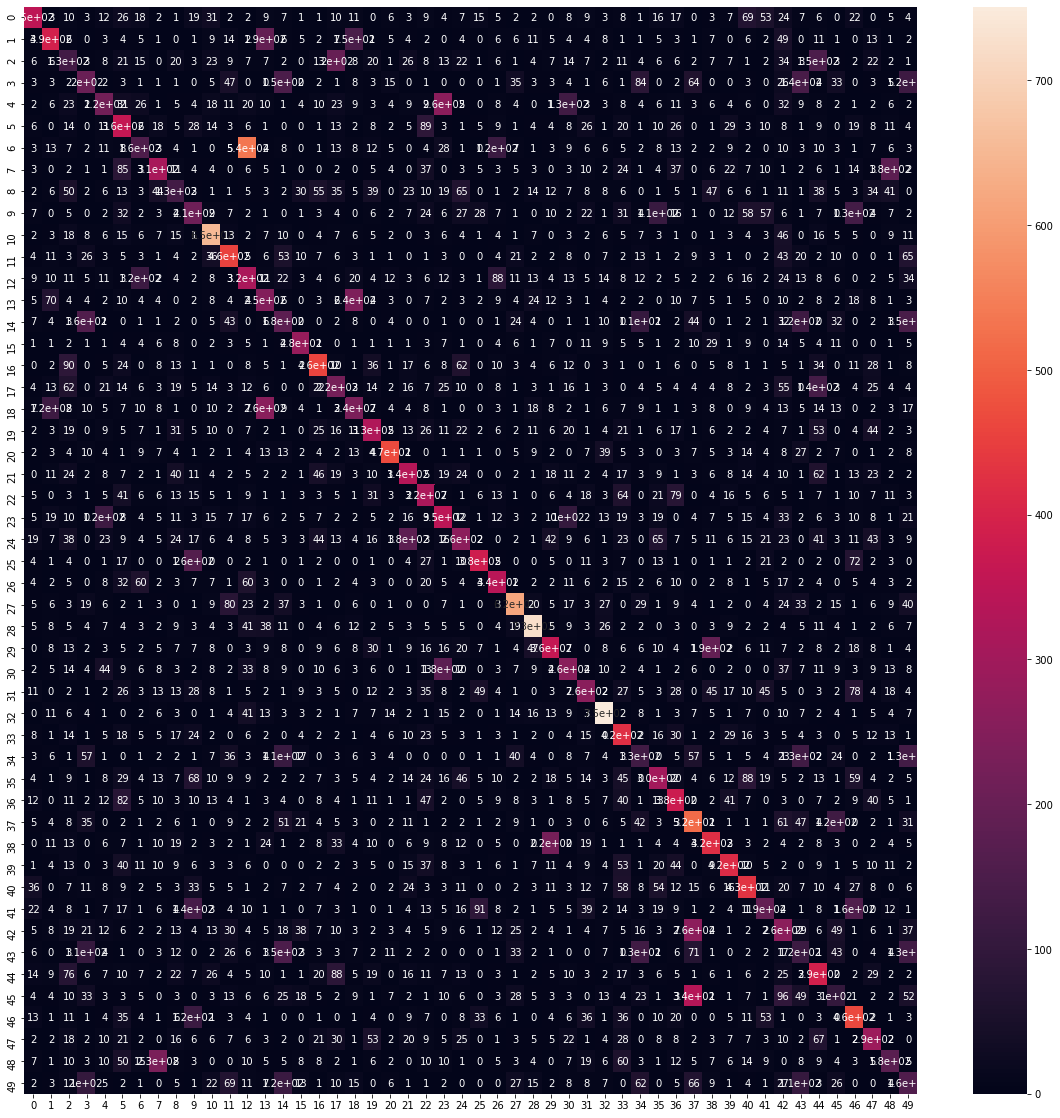

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.tensorboard import SummaryWriter

output_size = 50
hidden_size = 300
vocab_size = len(TEXT.vocab)
embedding_length = 100
word_embeddings = TEXT.vocab.vectors
num_epochs = 1
mode = 'lstm'

model = AuthorClassifier(mode, output_size, hidden_size, vocab_size, embedding_length, word_embeddings)
model = model.to(device)


loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=1.25*1e-2) #learning rate- different from Article_level_lstm
log_dir = 'runs/lstm1'
final_acc_train_lstm = []
final_loss_train_lstm = []
final_loss_test_lstm = []
final_acc_test_lstm = []
final_f1score_train_lstm = []
final_f1score_test_lstm = []


for multi in range(20):
  loss_train,f1score_train,accuracy_train = train_classifier(model, train_iterator, loss_function, optimizer, log = log_dir, num_epochs = num_epochs)
  overall_pred,overall_label,accuracy_test,loss_test,f1ss = evaluate_classifier(model, val_iterator, loss_function)
  final_acc_train_lstm.append(accuracy_train[0])
  final_acc_test_lstm.append(accuracy_test[0])
  final_f1score_train_lstm.append(f1score_train[0])
  final_f1score_test_lstm.append(f1ss)
  final_loss_train_lstm.append(loss_train[0])
  final_loss_test_lstm.append(loss_test[0])


cf = np.zeros((50,50))

overall_pred = [val for sublist in overall_pred for val in sublist]

overall_label = [val for sublist in overall_label for val in sublist]

ziplist = list(zip(overall_label,overall_pred))
for coordinate in ziplist:
  cf[coordinate]+=1

plt.figure(figsize = (20,20))
ax = sns.heatmap(cf,annot=True)

**GRU**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


---Training--- Epoch: 1 Acc: 0.34203125720344846 Loss: 0.035688695200393875 F1 Score: 0.2528653276692457
Validation statistics: Acc: 0.36864349011588277 Loss: 0.03515534734243806 F1 Score: 0.3537243934926048
---Training--- Epoch: 1 Acc: 0.5212530542621364 Loss: 0.024952739122678813 F1 Score: 0.41430047350321086
Validation statistics: Acc: 0.38666212224494434 Loss: 0.035038949608450665 F1 Score: 0.38059360647083035
---Training--- Epoch: 1 Acc: 0.5761375685768291 Loss: 0.021864209132627366 F1 Score: 0.4685242604589075
Validation statistics: Acc: 0.38752556237218816 Loss: 0.036998408677983735 F1 Score: 0.38396306740141983
---Training--- Epoch: 1 Acc: 0.6135493983679867 Loss: 0.019854278945531552 F1 Score: 0.5077344948549691
Validation statistics: Acc: 0.3850488525335151 Loss: 0.03826305207759785 F1 Score: 0.37798355113753357
---Training--- Epoch: 1 Acc: 0.6389516389285879 Loss: 0.018471174327825194 F1 Score: 0.5334957034541578
Validation statistics: Acc: 0.3911383776414451 Loss: 0.0385631

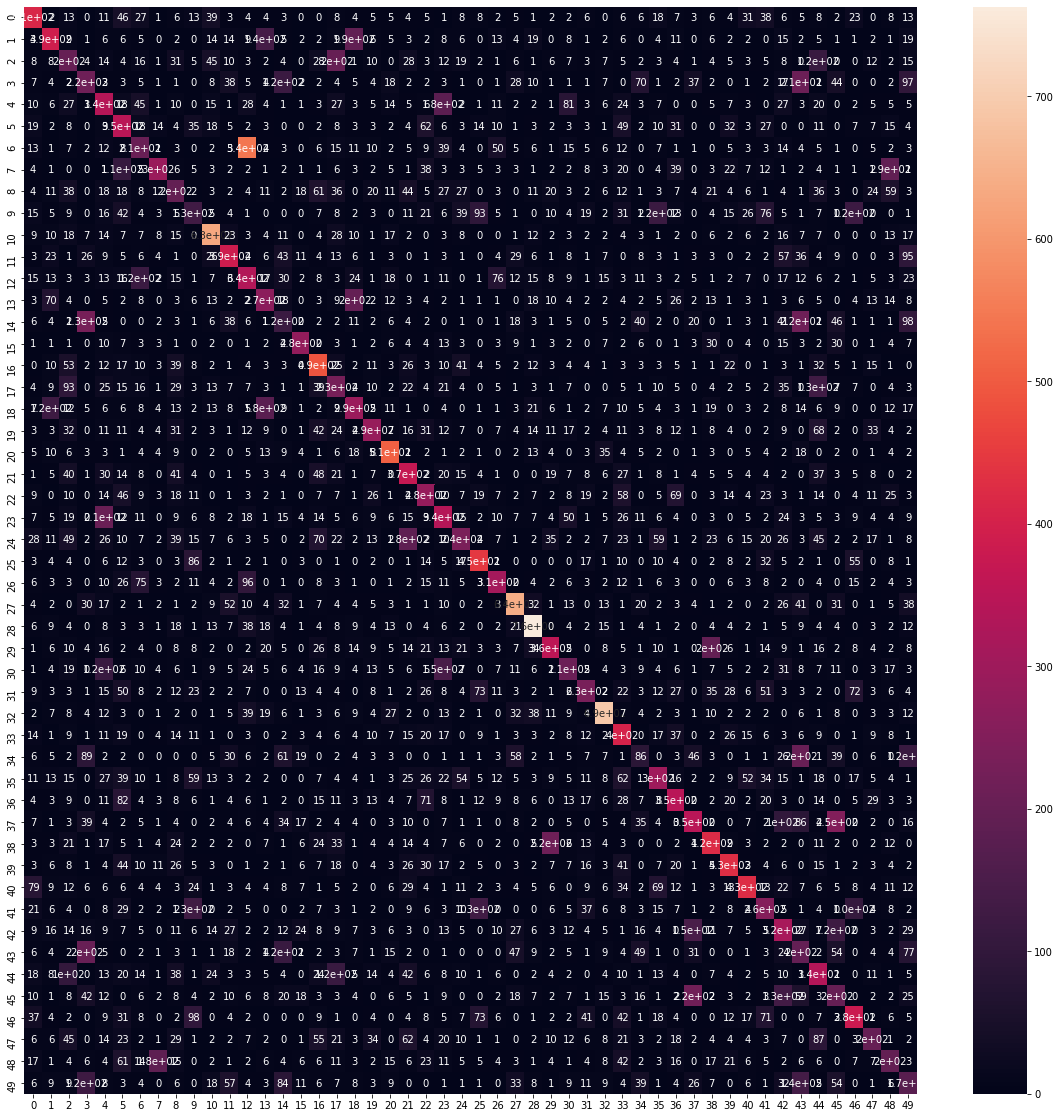

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from torch.utils.tensorboard import SummaryWriter


output_size = 50
hidden_size = 300
vocab_size = len(TEXT.vocab)
embedding_length = 100
word_embeddings = TEXT.vocab.vectors
num_epochs = 1
mde = 'gru'

model = AuthorClassifier(mode, output_size, hidden_size, vocab_size, embedding_length, word_embeddings)
model = model.to(device)


loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=1.25*1e-2)
log_dir = 'runs/gru'
final_acc_train_gru  = []
final_acc_test_gru = []
final_f1score_train_gru = []
final_f1score_test_gru = []
final_loss_train_gru = []
final_loss_test_gru = []

for multi in range(20):
  loss_train,f1score_train,accuracy_train = train_classifier(model, train_iterator, loss_function, optimizer, log = log_dir, num_epochs = num_epochs)
  overall_pred,overall_label,accuracy_test,loss_test,f1ss = evaluate_classifier(model, val_iterator, loss_function)
  final_acc_train_gru.append(accuracy_train[0])
  final_loss_train_gru.append(loss_train[0])
  final_acc_test_gru.append(accuracy_test[0])
  final_f1score_train_gru.append(f1score_train[0])
  final_f1score_test_gru.append(f1ss)
  final_loss_test_gru.append(loss_test[0])

cf = np.zeros((50,50))

overall_pred = [val for sublist in overall_pred for val in sublist]

overall_label = [val for sublist in overall_label for val in sublist]

ziplist = list(zip(overall_label,overall_pred))
for coordinate in ziplist:
  cf[coordinate]+=1

plt.figure(figsize = (20,20))
ax = sns.heatmap(cf,annot=True)

**BiLSTM**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


---Training--- Epoch: 1 Acc: 0.4153335484763266 Loss: 0.03169524962435696 F1 Score: 0.31865583461749875
Validation statistics: Acc: 0.3905021586003181 Loss: 0.0345124434826185 F1 Score: 0.384930093997331
---Training--- Epoch: 1 Acc: 0.5910285371813194 Loss: 0.021331987422859404 F1 Score: 0.48667327664814686
Validation statistics: Acc: 0.39984094523971825 Loss: 0.03671607168201316 F1 Score: 0.4012072923480144
---Training--- Epoch: 1 Acc: 0.6540961689179844 Loss: 0.017891166308109628 F1 Score: 0.5522170713662391
Validation statistics: Acc: 0.39863667348329923 Loss: 0.03924358799711625 F1 Score: 0.3950624973113982
---Training--- Epoch: 1 Acc: 0.6942971739431101 Loss: 0.015613571961420348 F1 Score: 0.5943849097325569
Validation statistics: Acc: 0.39177459668257214 Loss: 0.04208376105333886 F1 Score: 0.39161656452023813
---Training--- Epoch: 1 Acc: 0.7172329537596238 Loss: 0.014322719257251943 F1 Score: 0.622048730826177
Validation statistics: Acc: 0.39168370824812543 Loss: 0.04353855152044

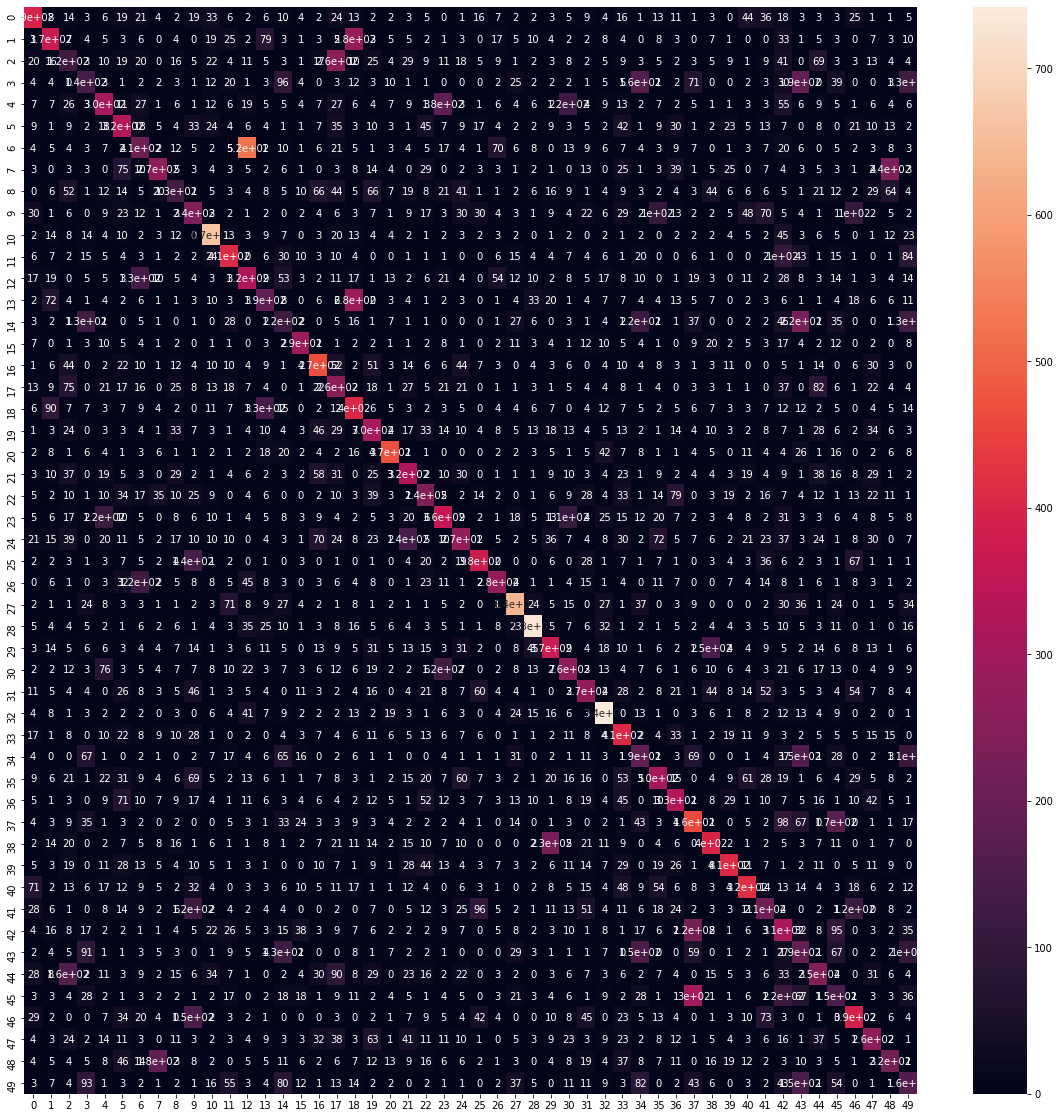

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from torch.utils.tensorboard import SummaryWriter

output_size = 50
hidden_size = 300
vocab_size = len(TEXT.vocab)
embedding_length = 100
word_embeddings = TEXT.vocab.vectors
num_epochs = 1
mode = 'bilstm'

model = AuthorClassifier(mode, output_size, hidden_size, vocab_size, embedding_length, word_embeddings)
model = model.to(device)


loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=1.25*1e-2)
log_dir = 'runs/bilstm'
final_acc_train_bilstm  = []
final_acc_test_bilstm = []
final_f1score_train_bilstm = []
final_f1score_test_bilstm = []
final_loss_train_bilstm = []
final_loss_test_bilstm = []

for multi in range(20):
  loss_train,f1score_train,accuracy_train = train_classifier(model, train_iterator, loss_function, optimizer, log = log_dir, num_epochs = num_epochs)
  overall_pred,overall_label,accuracy_test,loss_test,f1ss = evaluate_classifier(model, val_iterator, loss_function)
  final_acc_train_bilstm.append(accuracy_train[0])
  final_loss_train_bilstm.append(loss_train[0])
  final_acc_test_bilstm.append(accuracy_test[0])
  final_f1score_train_bilstm.append(f1score_train[0])
  final_f1score_test_bilstm.append(f1ss)
  final_loss_test_bilstm.append(loss_test[0])

cf = np.zeros((50,50))

overall_pred = [val for sublist in overall_pred for val in sublist]
overall_label = [val for sublist in overall_label for val in sublist]

ziplist = list(zip(overall_label,overall_pred))
for coordinate in ziplist:
  cf[coordinate]+=1

plt.figure(figsize = (20,20))
ax = sns.heatmap(cf,annot=True)

**Plot Accuracy**

In [ ]:
#Plot - accuracy
import plotly.graph_objects as go
fig_accuracy = go.Figure()

fig_accuracy.update_layout(
    title="C50 1 sentences Accuracy- LSTM, GRU, BiLSTM",
    xaxis_title="Epochs",
    yaxis_title="Accuracy",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

# fig_accuracy.add_trace(go.Scatter(
#     y=final_acc_train_lstm,
#     connectgaps=True, marker_color='rgba(128, 0, 0, 0.9)', name = 'Training accuracy lstm'))

fig_accuracy.add_trace(go.Scatter(
    y=final_acc_test_lstm,
    connectgaps=True, marker_color='rgba(255, 0, 0, 0.9)', name = 'Testing accuracy lstm'))

# fig_accuracy.add_trace(go.Scatter(
#     y=final_acc_train_gru,
#     connectgaps=True, marker_color='rgba(0, 128, 0, 0.9)', name = 'Training accuracy gru'))
fig_accuracy.add_trace(go.Scatter(
    y=final_acc_test_gru,
    connectgaps=True, marker_color = 'rgba(0, 255, 0, 0.9)', name = 'Testing accuracy gru'))

# fig_accuracy.add_trace(go.Scatter(
#     y=final_acc_train_bilstm,
#     connectgaps=True, marker_color='rgba(0, 0, 128, 0.9)', name = 'Training accuracy bilstm'))
fig_accuracy.add_trace(go.Scatter(
    y=final_acc_test_bilstm, connectgaps=True, marker_color='rgba(0, 0, 255, 0.9)',
    name='Test accuracy bilstm'))

fig_accuracy.show()
# fig_accuracy.write_image("images/C50_5_sentences.png")

**LOSS PLOTS**

In [ ]:
#Loss Plots
import plotly.graph_objects as go
fig_loss = go.Figure()

fig_loss.update_layout(
    title="C50 1 sentences Loss- LSTM, GRU, BiLSTM",
    xaxis_title="Epochs",
    yaxis_title="Loss",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

# fig_loss.add_trace(go.Scatter(
#     y=final_loss_train_lstm,
#     connectgaps=True, marker_color='rgba(128, 0, 0, 0.9)', name = 'Training Loss lstm'))

fig_loss.add_trace(go.Scatter(
    y=final_loss_test_lstm,
    connectgaps=True, marker_color='rgba(255, 0, 0, 0.9)', name = 'Testing Loss lstm'))

# fig_loss.add_trace(go.Scatter(
#     y=final_loss_train_gru,
#     connectgaps=True, marker_color='rgba(0, 128, 0, 0.9)', name = 'Training Loss gru'))

fig_loss.add_trace(go.Scatter(
    y=final_loss_test_gru,
    connectgaps=True, marker_color='rgba(0, 255, 0, 0.9)', name = 'Testing Loss gru'))

# fig_loss.add_trace(go.Scatter(
#     y=final_loss_train_bilstm,
#     connectgaps=True, marker_color='rgba(0, 0, 128, 0.9)', name = 'Training Loss bilstm'))

fig_loss.add_trace(go.Scatter(
    y=final_loss_test_bilstm,
    connectgaps=True, marker_color='rgba(0, 0, 255, 0.9)', name = 'Testing Loss bilstm'))

fig_loss.show()

**Plot - f1score**

In [ ]:
#Plot - f1score
import plotly.graph_objects as go
fig_f1score = go.Figure()

fig_f1score.update_layout(
    title="C50 1 sentence f1 score- LSTM, GRU, BiLSTM",
    xaxis_title="Epochs",
    yaxis_title="f1 score",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

# fig_f1score.add_trace(go.Scatter(
#     y=final_f1score_train_lstm,
#     connectgaps=True, marker_color='rgba(128, 0, 0, 0.9)', name = 'Training f1score lstm'))

fig_f1score.add_trace(go.Scatter(
    y=final_f1score_test_lstm,
    connectgaps=True, marker_color='rgba(255, 0, 0, 0.9)', name = 'Testing f1score lstm'))

# fig_f1score.add_trace(go.Scatter(
#     y=final_f1score_train_gru,
#     connectgaps=True, marker_color='rgba(0, 128, 0, 0.9)', name = 'Training f1score gru'))
fig_f1score.add_trace(go.Scatter(
    y=final_f1score_test_gru,
    connectgaps=True, marker_color = 'rgba(0, 255, 0, 0.9)', name = 'Testing f1score gru'))

# fig_f1score.add_trace(go.Scatter(
#     y=final_f1score_train_bilstm,
#     connectgaps=True, marker_color='rgba(0, 0, 128, 0.9)', name = 'Training f1score bilstm'))
fig_f1score.add_trace(go.Scatter(
    y=final_f1score_test_bilstm, connectgaps=True, marker_color='rgba(0, 0, 255, 0.9)',
    name='Test f1score bilstm'))

fig_f1score.show()